In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# Load and Preview Data
df = pd.read_csv("online_retail_II.csv") 
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11727 entries, 0 to 11726
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Invoice      11727 non-null  object 
 1   StockCode    11727 non-null  object 
 2   Description  11709 non-null  object 
 3   Quantity     11727 non-null  int64  
 4   InvoiceDate  11727 non-null  object 
 5   Price        11727 non-null  float64
 6   Customer ID  8679 non-null   float64
 7   Country      11726 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 733.1+ KB


In [4]:
df.describe()

,Quantity,Price,Customer ID
count,11727.000000,11727.000000,8679.000000
mean,9.977744,4.254182,15507.678995
std,90.760628,24.533567,1613.669765
min,-1043.000000,0.000000,12349.000000
25%,1.000000,1.250000,14156.000000
50%,3.000000,2.570000,15581.000000
75%,8.000000,4.650000,16891.000000
max,5184.000000,1998.490000,18287.000000


In [5]:
# Checking for missing varaiables
df.isnull().sum()

Invoice           0
StockCode         0
Description      18
Quantity          0
InvoiceDate       0
Price             0
Customer ID    3048
Country           1
dtype: int64

In [8]:
# Clean & Prepare
# Remove nulls and returns (Quantity < 0)
df.dropna(subset=['Invoice', 'StockCode', 'Quantity', 'Price'], inplace=True)
df = df[df['Quantity'] > 0]
df = df[df['Price'] > 0]


/tmp/ipykernel_1360/351105993.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Invoice', 'StockCode', 'Quantity', 'Price'], inplace=True)


In [10]:
# Add total sales column
df['TotalSales'] = df['Quantity'] * df['Price']

In [11]:
# Checking if there are still missing variables
df.isnull().sum()

Invoice           0
StockCode         0
Description       0
Quantity          0
InvoiceDate       0
Price             0
Customer ID    3015
Country           1
TotalSales        0
dtype: int64

In [12]:
# Dropping Customer ID column
df = df.drop('Customer ID', axis=1)

In [14]:
#  Aggregate Per Product
product_df = df.groupby('StockCode').agg({
    'Quantity': 'sum',
    'Price': 'mean',
    'TotalSales': 'sum'
}).reset_index()

In [15]:
# 5. Scaling
features = ['Quantity', 'Price', 'TotalSales']
scaler = StandardScaler()
scaled = scaler.fit_transform(product_df[features])

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/joblib/externals/loky/backend/context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/joblib/externals/loky/backend/context.py", line 217, in _count_physical_cores
    raise ValueError(
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The defau

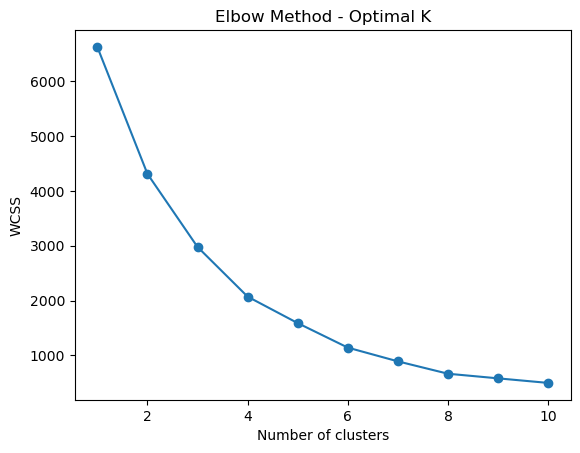

In [16]:
#  Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method - Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
# K-Means Clustering
k = 4  
model = KMeans(n_clusters=k, random_state=42)
product_df['Cluster'] = model.fit_predict(scaled)

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
